# A warm-up with Numpy and Scikit-Learn !

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

plt.close('all')

# Linear Regression

## Exo 1 : plot dataset                  median average house-price VS feature of your choice (5 min)

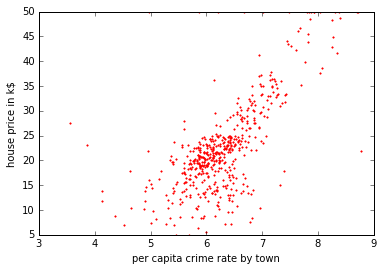

In [2]:
boston = load_boston()

feature_name = 'per capita crime rate by town'
feature = 5
target_name = 'house price in k$'

x = np.array(boston.data[:,feature:feature+1])
y = np.array(boston.target)
y = np.column_stack(y).T

plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.plot(x,y,'r.', markersize=3)
plt.show()

#Uncomment to get more information
#print boston.DESCR

## Exo 2 : Split & Plot your set in Training/ Testing (5 min)              

### Fill those 2 variables :                       N is number of instances         M is number of features

In [3]:
N = x.shape[0]
M = x.shape[1]+1

In [4]:
from sklearn.preprocessing import StandardScaler

def Scale(x):
    return StandardScaler().fit_transform(x)
    
def AddBias(x):
    o = np.ones((x.shape[0],1))
    return np.column_stack((o,x))
    
def PreProcess(x):
	return AddBias(Scale(x))

Above we defined the function to pre-process the data. Basically it will substract average, divide by mean & add a column of zero for bias

/home/valeodar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/valeodar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/valeodar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/valeodar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


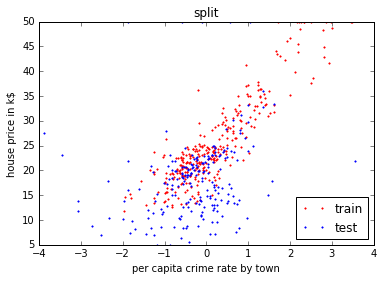

In [5]:
X = PreProcess(x)
ratio = 0.6
Ntr = N*ratio
Nte = N-Ntr
Xtr = X[0:Ntr]
Xte = X[Ntr:N]
Ytr = y[0:Ntr]
Yte = y[Ntr:N]

fig = plt.figure()
plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.plot(Xtr[:,1:2],Ytr,'r.', markersize=3)
plt.plot(Xte[:,1:2],Yte,'b.', markersize=3)
plt.legend(('train','test'),loc='lower right')
plt.title('split')
plt.show()

## Exo 3 : Learn a linear Model with Least-Square (15 min)         

We define the linear model

[[ 3.503162]
 [ 3.503162]]


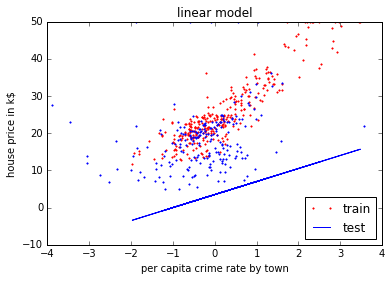

current cost :  [ 487.7098773]


In [6]:
class least_square_model(object):
       
    def predict(self,X):
        return X.dot(self.W)
    
    def Cost(self,X,Y,W):
        pred = X.dot(W)
        diff = pred-Y
        cost = np.sum(diff*diff,axis=0)/X.shape[0]
        return cost
        
    def CostGradient(self,X,Y,W):
        numsamples = X.shape[0]
        H = X.dot(W)
        D = (H-Y).T    
        gradient = D.dot(X)/numsamples
        return gradient
        
    def GradientDescent(self,X,Y,alpha,niter):
        Descent = np.ones((X.shape[1],niter))
        Costs = np.ones((1,niter))
        W = np.ones((X.shape[1],1))*100
        cost = self.Cost(X,Y,W)
        for iter in range(niter): 
            gradient = self.CostGradient(X,Y,W)
            W = W-alpha*gradient.T
            cost = self.Cost(X,Y,W)
            i = iter
            Descent[:,i:i+1] = W
            Costs[:,i:i+1] = cost
        return Descent,Costs
    
    def ExactSolver(self,X,Y): 
        #normal equation solver (plot your model)
        DD = (X.T).dot(X)
        DY = (X.T).dot(Y)   
        W = np.linalg.inv(DD).dot(DY)
        Prediction = X.dot(W)
        Difference = Prediction-Y
        cost = np.average((Difference)*(Difference))
        return W,cost
        
    def train(self,X,Y):
        return ExactSolver(X,Y)
    
    def plot(self,Xtr,Xte,Ytr,Yte,W,feature_name,target_name):
        fig = plt.figure()
        P = Xtr.dot(W)
        plt.xlabel(feature_name)
        plt.ylabel(target_name)
        plt.plot(Xtr[:,1],Ytr,'r.', markersize=3)
        plt.plot(Xtr[:,1],P)
        plt.plot(Xte[:,1],Yte,'b.', markersize=3)
        plt.legend(('train','test'),loc='lower right')
        plt.title('linear model')
        plt.show()
        
ls = least_square_model()
Weights = np.ones((X.shape[1],1))*np.random.randn()*10
print(Weights)
ls.plot(Xtr,Xte,Ytr,Yte,Weights,feature_name,target_name)
print( 'current cost : ',ls.Cost(Xtr,Ytr,Weights))

let's init the weights of the model, we will see random weights do not fit the model (a bit obvious ... )

In [7]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def PlotCostFunc(x,y,model):
    print (x.shape[1])
    numsamples = x.shape[0]
    wg = np.mgrid[-50:100:10,-50:100:10]      
    npoints = wg.shape[1]*wg.shape[2]
    
    Grid = np.reshape(wg,(2,npoints))
    Grid2 = Grid
    if( x.shape[1] > 2):
        Grid2 = np.row_stack((np.ones((1,npoints)),Grid))
    else:
        Grid2 = Grid
        
    y = np.reshape(y,(numsamples,1))
    
    CostFunc = model.Cost(x,y,Grid2)
    
    xx = Grid[0]
    yy = Grid[1]
    z = CostFunc.reshape((npoints))

    
    fig = plt.figure()
    
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(xx, yy, z, cmap=cm.jet, linewidth=0.2)
    
    return fig

weights:
[ 23.91664823   7.91930609]
final cost after gradient descent :
15.2889956811
2


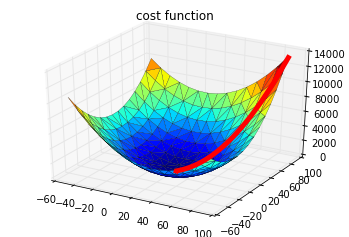

In [8]:
numIter = 100
alpha = 0.1

Descent, Costs = ls.GradientDescent(Xtr,Ytr,alpha,numIter)

Wgd = Descent[:,-1]
x = Descent[0]
y = Descent[1]
z = Costs[0]

print( 'weights:') ,
print(Wgd)
print ('final cost after gradient descent :'),
print( z[-1])

#if you want to play around, disable %matplotlib inline at the beginning of the ipynb
fig = PlotCostFunc(Xtr,Ytr,ls)

ax = fig.gca(projection='3d')
ax.plot(x, y, z, 'r',linewidth=5)
plt.title('cost function')

[[ 23.91722824]
 [  7.91840711]]
final cost after normal equation solving :
15.2889947103


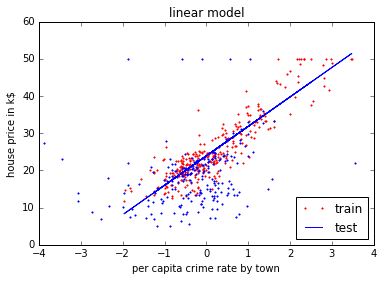

In [9]:
#The Exact Method
Weights, NewCost = ls.ExactSolver(Xtr,Ytr)

print( Weights)
print( 'final cost after normal equation solving :'),
print( NewCost)

ls.plot(Xtr,Xte,Ytr,Yte,Weights,feature_name,target_name)

Ok, Why did gradient descent worked so well this time? Because the cost function is "convex" (a bowl shape), so it's pretty easy to get to the minimum

# Classification : Logistic Regression and some validation metrics...

## Exo 1 : plot  classification dataset

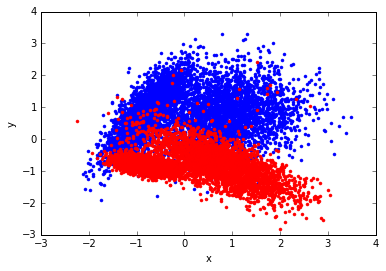

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.svm import SVC

# linearly separable data preparation 
X, y = make_classification(n_samples=20000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
# non linearly separable data
#X, y = make_circles(n_samples = 1000,noise=0.1,random_state=1)

#Xs = Scale(X)
Xlr = PreProcess(X)
X_train, X_test, y_train, y_test = train_test_split(Xlr, y, test_size=.4)

# just plot the dataset first

nsamples = X_train.shape[0]
nfeatures = X_train.shape[1]

y_train = y_train.reshape((nsamples,1))
posmask = y_train.dot(np.ones((1,nfeatures-1)))
negmask = 1-posmask

X_trp = X_train[:,1:3]*posmask
X_trn = X_train[:,1:3]*negmask

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_trp[:,0],X_trp[:,1],'b.', markersize=6)
plt.plot(X_trn[:,0],X_trn[:,1],'r.', markersize=6)


In [11]:
from scipy import optimize

#define base functions for logistic regression
def exp(X,W):
    h = np.exp(-X.dot(W))
    return h
    
def logit(X,W):
   h = 1/(1+np.exp(-X.dot(W))) 
   return h
   
def predict(X,W):
    h = 1/(1+np.exp(-X.dot(W))) 
    return h

def Cost(t,x,y):
    m = x.shape[0]
    h = x.dot(t)
    h2 = np.sum(np.log(1+exp(x,t)))
    yp = y-1
    c = yp.T.dot(h)-h2
    c = -c/m
    return c
    
def CostGradient(t,x,y):
    m = x.shape[0]
    h = logit(x,t)
    d = h-y
    g = x.T.dot(d)/m
    return g

In [12]:
def GradientDescent(X,Y,alpha,niter):
    Descent = np.ones((X.shape[1],niter))
    Costs = np.ones((1,niter))
    t = np.ones((X.shape[1],1))*100
    cost = Cost(t,X,Y)
    oldcost = cost
    for iter in range(niter):
        gradient = CostGradient(t,X,Y)
        t = t-alpha*gradient
        cost = Cost(t,X,Y)
        i = iter
        Descent[:,i:i+1] = t
        Costs[:,i] = cost
        
        relative_change = abs(oldcost-cost)
        if( oldcost < cost or relative_change < 1e-6 ):
            break
        oldcost = cost
        
    return Descent,Costs
    
def trainNaive(X,Y,alpha=0.001,niter=1000):
    D,C = GradientDescent(X,Y,alpha,niter)
    Wgd = D[0:X.shape[1],-1].reshape(3,1)
    return Wgd, D, C
    
def trainOptim(x,y):
    m, n = x.shape
    initial_theta = np.zeros((n,1))
    print( initial_theta.shape   )
    theta = optimize.fmin_bfgs(Cost, x0=initial_theta, args=(x,y))
    return theta
    

def plotModel(Data,Y,W):
    #plot data
    nfeatures = Data.shape[1]
    nsamples = Data.shape[0]
    y = Y.reshape((nsamples,1))
    posmask = y.dot(np.ones((1,nfeatures-1)))
    negmask = 1-posmask
    
    X_trp = Data[:,1:3]*posmask
    X_trn = Data[:,1:3]*negmask

    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X_trp[:,0],X_trp[:,1],'b.', markersize=6)
    plt.plot(X_trn[:,0],X_trn[:,1],'r.', markersize=6)

    #plot confidence map
    h = 0.2 #step in the mesh
    x_min, x_max = Data[:, 1].min() - .5, Data[:, 1].max() + .5
    y_min, y_max = Data[:, 2].min() - .5, Data[:, 2].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    Xgrid = np.c_[xx.ravel(), yy.ravel()]
    o = np.ones((Xgrid.shape[0],1))
    Xgrid = np.column_stack((o,Xgrid))
    Z = logit(Xgrid,W)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.6)

In [13]:
Wgd,Descent,Costs = trainNaive(X_train,y_train,0.1,1000) #play with number of iterations
predictions = (predict(X_test,Wgd) >= 0.5)*1

accuracy_score = skm.accuracy_score(y_test,predictions)
print( 'accuracy_score with naive gradient descent :'),
print( accuracy_score)

Wgd2 = trainOptim(X_train,y_train)
predictions2 = (predict(X_test,Wgd2) >= 0.5)*1

accuracy_score2 = skm.accuracy_score(y_test,predictions2)
print( 'accuracy_score with optimized gradient descent :'),
print( accuracy_score2)

accuracy_score with naive gradient descent :
0.750125
(3, 1)
Optimization terminated successfully.
         Current function value: 0.212783
         Iterations: 20
         Function evaluations: 105
         Gradient evaluations: 21
accuracy_score with optimized gradient descent :
0.925875


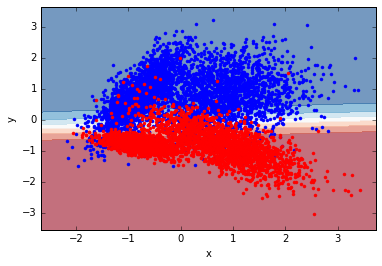

In [14]:
plotModel(X_test,y_test,Wgd2)

## Compare 2 classification Models with a ROC curve!

/home/valeodar/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


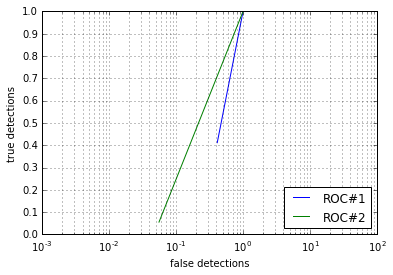

In [15]:
roc1 = skm.roc_curve(y_test, predictions)
roc2 = skm.roc_curve(y_test, predictions2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale("log", nonposx='clip')
ax.grid(True, which='both', axis='both')
ax.set_xlabel('false detections')
ax.set_ylabel('true detections')
ax.axis([1e-3, 100, 0, 1])
ax.yaxis.set_ticks(np.arange(0,1.1,0.1))
ax.legend(bbox_to_anchor=(.8, 1), loc=2, borderaxespad=0.)       
ax.semilogx(roc1[0],roc1[0],label='ROC#1' )
ax.semilogx(roc2[0],roc2[0],label='ROC#2' )
plt.legend(loc="lower right")


# K-MEANS Solver

In [16]:
#this code will change your vector of indices into a binary matrix    
def getBinarizedIndexVector(v,K):
    rnk = np.zeros((v.shape[0], K))
    rnk[np.arange(v.shape[0]), v.T-1] = 1
    return rnk

"""
    1. fill the function which attributes binary labels to 
    rnk = 1 if arg_min_j||xn-muj||², 0 otherwise
 
    2. you will also output the cost J
    
    J = 1/n*SUM_i{ SUM_k{rnk*||xn-muj||²}}
"""   
def getRNK(X,centroids):
    n = X.shape[0]
    K = centroids.shape[0]
    Euclidian = np.zeros((n,K))
    # here you need to compute a matrix of n*K euclidian distances between X and centroids
    # you can do it inside a loop if you don't know where to start for vectorization
    for k in range(0,K):
        centroid = centroids[k,:]
        #here you compute the squared euclidian distance between the data & the centroid 
        # note : Y = (X-centroid) is formally wrong but numpy will broadcast
        diff = X-centroid
        Euclidian[:,k] = np.sum(diff*diff,axis=1) 
   
    #np.argmin gives you the indice of min euclidian distance per sample
    rnk = np.argmin(Euclidian,axis=1)   
    brnk = getBinarizedIndexVector(rnk,K)    
    
    Eucli = brnk*Euclidian

    cost = sum(sum(Eucli))/n
    
    return rnk, brnk, cost
    
"""
    2. compute the K centroids
    
"""
def initCentroids(X,K):
    n = X.shape[0]
    m = X.shape[1]
    np.random.seed(5)
    centroids = np.random.rand(K,m) #bad init
    
    #for better init, you will choose centroids randomly in training data
    for k in range(0,K):
        index = np.random.randint(n)
        centroids[int(k),:] = X[index,:]
        
    return centroids

def updateCentroids(X,brnk):
    s = np.sum(brnk,axis=0)
    s = 1/(s+1e-10)
    bb = brnk*s
    centroids = bb.T.dot(X)
    return centroids
    

def Solver(X,K,numIters,verbose=False):
    centroids = initCentroids(X,K)
    
    rnk, brnk, c = getRNK(X,centroids)
    centroids = updateCentroids(X,brnk)
    if(verbose):
        print( 'initial cost : '),
        print( c)
    
    #here you iterate: compute rnk -> compucentroids = updateCentroids(X,brnk)te KMeans -> compute rnk ...
    for i in range(0,numIters):
        rnk, brnk, cost = getRNK(X,centroids)
        centroids = updateCentroids(X,brnk)  
        if(verbose):
            print( 'iteration#'),
            print( i),
            print( 'cost = '),
            print( cost)
        if( abs(c-cost) < 1e-3 ):
            break
        c = cost
        
        
    return centroids, rnk
    

In [17]:
def PlotGroups(X,labels,fignum):
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length') 

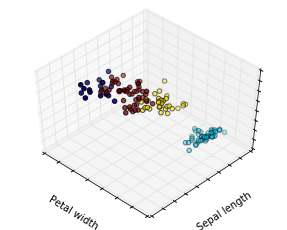

In [18]:
# first try our kmeans solver on 3D data 
import sklearn.datasets as datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target
X = X[1:1000]
Centroids, labels = Solver(X,4,10)
PlotGroups(X,labels,0)

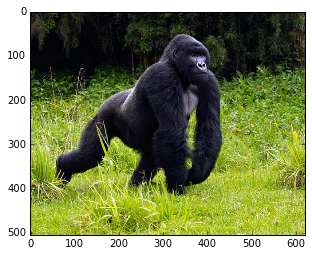

In [19]:
from scipy import ndimage

fname = '/home/valeodar/Images/gorilla.jpeg'
img = ndimage.imread(fname)
fig = plt.figure()
plt.imshow(img)

s = img.shape
numElem = s[0]*s[1]
img_vec = np.reshape(img,(numElem,s[2]))
